In [149]:
from IPython import display

In [150]:
try:
    import nbformat
except:
    !pip install nbformat
display.clear_output()

+ action: train_feat03
+ feat_path: ../../exps/featbase_21102025/data.npz
+ seed: 42
+ exp_dir: d:\dai_hoc\nam3\HK5\ML\LAB_GROUP\Challeng_1_Titanic_Final\process\exps
+ exp_name: trainbase_21102025
+ data_dir: d:\dai_hoc\nam3\HK5\ML\LAB_GROUP\Challeng_1_Titanic_Final\data
+ verbose: True
+ save_dir: d:\dai_hoc\nam3\HK5\ML\LAB_GROUP\Challeng_1_Titanic_Final\process\exps\trainbase_21102025
---------- information ----------
train-col: {'Parch', 'Fare', 'Ticket', 'Sex', 'Name', 'Embarked', 'Age', 'PassengerId', 'Cabin', 'SibSp', 'Pclass', 'Survived'}
test-col: {'Parch', 'Fare', 'Ticket', 'Sex', 'Name', 'Embarked', 'Age', 'PassengerId', 'Cabin', 'SibSp', 'Pclass'}
Union: {'Parch', 'Fare', 'Ticket', 'Sex', 'Name', 'Embarked', 'Age', 'PassengerId', 'Cabin', 'SibSp', 'Pclass'}
Difference: {'Survived'}


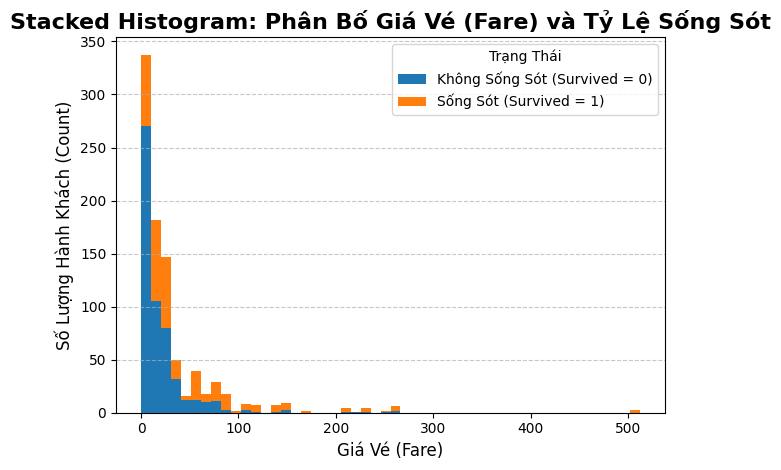

Runing ... [train_feat03]
Đã lưu DataFrame với đầy đủ thông tin cột


In [151]:
%run ../model/train.ipynb

In [152]:
!jupyter nbconvert  ../model/train.ipynb --to html 

[NbConvertApp] Converting notebook ../model/train.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 443919 bytes to ..\model\train.html


# Import lib


In [153]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve
import joblib

data = np.load("../../exps/trainbase_21102025/data.npz", allow_pickle=True)

In [154]:
with np.load('../../exps/trainbase_21102025/data.npz') as z:
    print(z.files)          # shows the list of keys present

['train_data', 'test_data', 'train_columns', 'test_columns']


In [155]:
data['train_columns']

array(['Sex', 'Age', 'Pclass', 'SibSp', 'Parch', 'PassengerId',
       'Embarked', 'Name_2', 'Name_3', 'Name_4', 'Name_5', 'Name_6',
       'Fare_2', 'Fare_3', 'Fare_4', 'Output'], dtype=object)

In [156]:
# Lấy dữ liệu train và test
df_train = pd.DataFrame(data = data['train_data'], columns= data['train_columns'])
df_test = pd.DataFrame(data['test_data'], columns=df_train.drop(columns=['Output']).columns)


In [157]:
df_train

,Sex,Age,Pclass,SibSp,Parch,PassengerId,Embarked,Name_2,Name_3,Name_4,Name_5,Name_6,Fare_2,Fare_3,Fare_4,Output
0,1.0,22.0,3.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,38.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,26.0,3.0,0.0,0.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,35.0,1.0,1.0,0.0,4.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,35.0,3.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,27.0,2.0,0.0,0.0,887.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
887,0.0,19.0,1.0,0.0,0.0,888.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.0,28.0,3.0,1.0,2.0,889.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
889,1.0,26.0,1.0,0.0,0.0,890.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [158]:
df_test

,Sex,Age,Pclass,SibSp,Parch,PassengerId,Embarked,Name_2,Name_3,Name_4,Name_5,Name_6,Fare_2,Fare_3,Fare_4
0,1.0,34.5,3.0,0.0,0.0,892.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,47.0,3.0,1.0,0.0,893.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,62.0,2.0,0.0,0.0,894.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,27.0,3.0,0.0,0.0,895.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,22.0,3.0,1.0,1.0,896.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.0,27.0,3.0,0.0,0.0,1305.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,0.0,39.0,1.0,0.0,0.0,1306.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
415,1.0,38.5,3.0,0.0,0.0,1307.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
416,1.0,27.0,3.0,0.0,0.0,1308.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
X_train = df_train.drop(columns=['Output', 'PassengerId'], axis=1)
y_train = df_train['Output']

In [160]:
X_test = df_test.drop(columns=['PassengerId'], axis=1)

# Logistic Regression


In [161]:
# Tạo pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

# Thiết lập hyperparameters
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear']
}

# Sử dụng Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search với multiple scoring metrics
grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=cv, 
    scoring={'accuracy': 'accuracy', 'f1': 'f1', 'roc_auc': 'roc_auc'},
    refit='accuracy',  # Chọn metric để chọn best model
    n_jobs=-1,
    verbose=1
)

# Train model
print("\nBắt đầu training với GridSearch...")
grid_search.fit(X_train, y_train)

# Kết quả
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

# Lấy tất cả kết quả cross-validation
cv_results = grid_search.cv_results_
print("\nCross-validation results:")
for i in range(len(cv_results['params'])):
    print(f"Params: {cv_results['params'][i]}")
    print(f"  Accuracy: {cv_results['mean_test_accuracy'][i]:.4f} (+/- {cv_results['std_test_accuracy'][i]:.4f})")
    print(f"  F1: {cv_results['mean_test_f1'][i]:.4f} (+/- {cv_results['std_test_f1'][i]:.4f})")
    print(f"  ROC AUC: {cv_results['mean_test_roc_auc'][i]:.4f} (+/- {cv_results['std_test_roc_auc'][i]:.4f})")


Bắt đầu training với GridSearch...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best parameters: {'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Best cross-validation accuracy: 0.8260

Cross-validation results:
Params: {'logreg__C': 0.01, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
  Accuracy: 0.7868 (+/- 0.0188)
  F1: 0.7094 (+/- 0.0316)
  ROC AUC: 0.8333 (+/- 0.0258)
Params: {'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
  Accuracy: 0.8070 (+/- 0.0179)
  F1: 0.7434 (+/- 0.0277)
  ROC AUC: 0.8670 (+/- 0.0195)
Params: {'logreg__C': 0.1, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
  Accuracy: 0.8238 (+/- 0.0097)
  F1: 0.7614 (+/- 0.0160)
  ROC AUC: 0.8682 (+/- 0.0198)
Params: {'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
  Accuracy: 0.8260 (+/- 0.0087)
  F1: 0.7673 (+/- 0.0147)
  ROC AUC: 0.8745 (+/- 0.0156)
Params: {'logreg__C': 1, 'logreg__penalty': 'l1', 'log

In [162]:
# Model tốt nhất
best_model_lr = grid_search.best_estimator_

# Đánh giá trên training set
y_pred_train = best_model_lr.predict(X_train)
y_pred_proba_train = best_model_lr.predict_proba(X_train)[:, 1]  # Xác suất lớp 1

# Tính các metrics
train_accuracy = best_model_lr.score(X_train, y_train)
train_f1 = f1_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_proba_train)

print(f"\n=== KẾT QUẢ TRÊN TRAINING SET ===")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC AUC: {train_roc_auc:.4f}")

# print("\nClassification Report:")
# print(classification_report(y_train, y_pred_train))


=== KẾT QUẢ TRÊN TRAINING SET ===
Accuracy: 0.8272
F1 Score: 0.7695
ROC AUC: 0.8779


## Dump mô hình logistic regression


In [163]:
import joblib

# Lưu model
joblib.dump(best_model_lr, '../../exps/trainbase_21102025/logistic_regression_model.pkl')
print("Model đã được lưu bằng joblib")

# Tham số
feature_names = X_train.columns.tolist()
scaler = best_model_lr.named_steps['scaler']

# Lưu nhiều objects cùng lúc
joblib.dump({
    'model': best_model_lr,
    'feature_names': feature_names,  # Nếu có
    'scaler': scaler,  # Nếu có
    'training_date': '2025-10-20'
}, '../../exps/trainbase_21102025/model_package.pkl')

# Load lại model
loaded_model = joblib.load('../../exps/trainbase_21102025/logistic_regression_model.pkl')

Model đã được lưu bằng joblib


# Random forest


In [164]:
# Tạo pipeline cho Random Forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # Vẫn có thể chuẩn hóa cho RF (không bắt buộc)
    ('rf', RandomForestClassifier(random_state=42))
])

# Thiết lập hyperparameters cho Random Forest
param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],           # Số cây trong rừng
    'rf__max_depth': [3, 5, 7, None],             # Độ sâu tối đa của cây
    'rf__min_samples_split': [2, 5, 10],          # Số mẫu tối thiểu để split
    'rf__min_samples_leaf': [1, 2, 4],            # Số mẫu tối thiểu ở lá
    'rf__max_features': ['sqrt', 'log2', None]    # Số features xét tại mỗi split
}

# Sử dụng Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search với multiple scoring metrics
grid_search_rf = GridSearchCV(
    pipeline_rf, 
    param_grid_rf, 
    cv=cv, 
    scoring={'accuracy': 'accuracy', 'f1': 'f1', 'roc_auc': 'roc_auc'},
    refit='accuracy',  # Chọn metric để chọn best model
    n_jobs=-1,
    verbose=1
)

# Train model
print("\nBắt đầu training Random Forest với GridSearch...")
grid_search_rf.fit(X_train, y_train)

# Kết quả
print("\nBest parameters:", grid_search_rf.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search_rf.best_score_))

# Lấy tất cả kết quả cross-validation
cv_results = grid_search_rf.cv_results_
print("\nCross-validation results (top 5 combinations):")
# Chỉ hiển thị 5 combination tốt nhất
best_indices = np.argsort(cv_results['mean_test_accuracy'])[-5:][::-1]

for i in best_indices:
    print(f"\nParams: {cv_results['params'][i]}")
    print(f"  Accuracy: {cv_results['mean_test_accuracy'][i]:.4f} (+/- {cv_results['std_test_accuracy'][i]:.4f})")
    print(f"  F1: {cv_results['mean_test_f1'][i]:.4f} (+/- {cv_results['std_test_f1'][i]:.4f})")
    print(f"  ROC AUC: {cv_results['mean_test_roc_auc'][i]:.4f} (+/- {cv_results['std_test_roc_auc'][i]:.4f})")

# Model tốt nhất
best_model_rf = grid_search_rf.best_estimator_

# Đánh giá trên training set
y_pred_train = best_model_rf.predict(X_train)
y_pred_proba_train = best_model_rf.predict_proba(X_train)[:, 1]  # Xác suất lớp 1

# Tính các metrics
train_accuracy = best_model_rf.score(X_train, y_train)
train_f1 = f1_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_proba_train)


Bắt đầu training Random Forest với GridSearch...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Best parameters: {'rf__max_depth': 7, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Best cross-validation accuracy: 0.8339

Cross-validation results (top 5 combinations):

Params: {'rf__max_depth': 7, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
  Accuracy: 0.8339 (+/- 0.0193)
  F1: 0.7627 (+/- 0.0286)
  ROC AUC: 0.8713 (+/- 0.0213)

Params: {'rf__max_depth': 7, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
  Accuracy: 0.8339 (+/- 0.0193)
  F1: 0.7627 (+/- 0.0286)
  ROC AUC: 0.8713 (+/- 0.0213)

Params: {'rf__max_depth': 7, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 10, 'rf__n_estimators': 50}
  Accuracy: 0.8328 (+/- 0.0129)
  F1: 0.7641 (+/- 0.0152)
  

In [165]:
print(f"\n=== KẾT QUẢ TRÊN TRAINING SET ===")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC AUC: {train_roc_auc:.4f}")

# print("\nClassification Report:")
# print(classification_report(y_train, y_pred_train))


=== KẾT QUẢ TRÊN TRAINING SET ===
Accuracy: 0.8575
F1 Score: 0.8000
ROC AUC: 0.9141


# Dump mô hình Random Forest


In [166]:
import joblib

# Lưu model
joblib.dump(best_model_rf, '../../exps/trainbase_21102025/random_forest_model.pkl')
print("Model đã được lưu bằng joblib")

# Tham số
feature_names = X_train.columns.tolist()
scaler = best_model_rf.named_steps['scaler']

# Lưu nhiều objects cùng lúc
joblib.dump({
    'model': best_model_rf,
    'feature_names': feature_names,  # Nếu có
    'scaler': scaler,  # Nếu có
    'training_date': '2025-10-20'
}, '../../exps/trainbase_21102025/model_package.pkl')

# Load lại model
loaded_model = joblib.load('../../exps/trainbase_21102025/random_forest_model.pkl')

Model đã được lưu bằng joblib


# XGBoost


In [167]:
# Tạo pipeline cho XGBoost
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),  # XGBoost thường không cần scaling nhưng vẫn có thể dùng
    ('xgb', XGBClassifier(random_state=42, eval_metric='logloss'))
])

# Thiết lập hyperparameters cho XGBoost
param_grid_xgb = {
    'xgb__n_estimators': [50, 100, 200],           # Số cây (boosting rounds)
    'xgb__max_depth': [3, 5, 7],                   # Độ sâu tối đa của cây
    'xgb__learning_rate': [0.01, 0.1, 0.2],       # Tốc độ học
    'xgb__subsample': [0.8, 0.9, 1.0],            # Tỷ lệ mẫu cho mỗi cây
    'xgb__colsample_bytree': [0.8, 0.9, 1.0],     # Tỷ lệ features cho mỗi cây
    'xgb__reg_alpha': [0, 0.1, 1],                # L1 regularization
    'xgb__reg_lambda': [1, 10, 100]               # L2 regularization
}

# Sử dụng Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search với multiple scoring metrics
grid_search_xgb = GridSearchCV(
    pipeline_xgb, 
    param_grid_xgb, 
    cv=cv, 
    scoring={'accuracy': 'accuracy', 'f1': 'f1', 'roc_auc': 'roc_auc'},
    refit='accuracy',  # Chọn metric để chọn best model
    n_jobs=-1,
    verbose=1
)

# Train model
print("\nBắt đầu training XGBoost với GridSearch...")
grid_search_xgb.fit(X_train, y_train)

# Kết quả
print("\nBest parameters:", grid_search_xgb.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search_xgb.best_score_))

# Lấy tất cả kết quả cross-validation
cv_results = grid_search_xgb.cv_results_
print("\nCross-validation results (top 5 combinations):")
# Chỉ hiển thị 5 combination tốt nhất
best_indices = np.argsort(cv_results['mean_test_accuracy'])[-5:][::-1]

for i in best_indices:
    print(f"\nParams: {cv_results['params'][i]}")
    print(f"  Accuracy: {cv_results['mean_test_accuracy'][i]:.4f} (+/- {cv_results['std_test_accuracy'][i]:.4f})")
    print(f"  F1: {cv_results['mean_test_f1'][i]:.4f} (+/- {cv_results['std_test_f1'][i]:.4f})")
    print(f"  ROC AUC: {cv_results['mean_test_roc_auc'][i]:.4f} (+/- {cv_results['std_test_roc_auc'][i]:.4f})")

# Model tốt nhất
best_model_xgb = grid_search_xgb.best_estimator_

# Đánh giá trên training set
y_pred_train = best_model_xgb.predict(X_train)
y_pred_proba_train = best_model_xgb.predict_proba(X_train)[:, 1]  # Xác suất lớp 1

# Tính các metrics
train_accuracy = best_model_xgb.score(X_train, y_train)
train_f1 = f1_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_proba_train)


Bắt đầu training XGBoost với GridSearch...
Fitting 5 folds for each of 2187 candidates, totalling 10935 fits

Best parameters: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 50, 'xgb__reg_alpha': 0.1, 'xgb__reg_lambda': 1, 'xgb__subsample': 0.9}
Best cross-validation accuracy: 0.8384

Cross-validation results (top 5 combinations):

Params: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 50, 'xgb__reg_alpha': 0.1, 'xgb__reg_lambda': 1, 'xgb__subsample': 0.9}
  Accuracy: 0.8384 (+/- 0.0188)
  F1: 0.7747 (+/- 0.0209)
  ROC AUC: 0.8658 (+/- 0.0120)

Params: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 50, 'xgb__reg_alpha': 0.1, 'xgb__reg_lambda': 1, 'xgb__subsample': 1.0}
  Accuracy: 0.8373 (+/- 0.0124)
  F1: 0.7740 (+/- 0.0133)
  ROC AUC: 0.8603 (+/- 0.0137)

Params: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__

In [168]:

print(f"\n=== KẾT QUẢ TRÊN TRAINING SET ===")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC AUC: {train_roc_auc:.4f}")

# print("\nClassification Report:")
# print(classification_report(y_train, y_pred_train))


=== KẾT QUẢ TRÊN TRAINING SET ===
Accuracy: 0.8900
F1 Score: 0.8478
ROC AUC: 0.9443


# Dump mô hình XGBoost


In [169]:
import joblib

# Lưu model
joblib.dump(best_model_xgb, '../../exps/trainbase_21102025/xgboost_model.pkl')
print("Model đã được lưu bằng joblib")

# Tham số
feature_names = X_train.columns.tolist()
scaler = best_model_xgb.named_steps['scaler']

# Lưu nhiều objects cùng lúc
joblib.dump({
    'model': best_model_xgb,
    'feature_names': feature_names,  # Nếu có
    'scaler': scaler,  # Nếu có
    'training_date': '2025-10-20'
}, '../../exps/trainbase_21102025/model_package.pkl')

# Load lại model
loaded_model = joblib.load('../../exps/trainbase_21102025/xgboost_model.pkl')

Model đã được lưu bằng joblib


# Chọn ra mô hình tối ưu


In [170]:
# Sử dụng best model từ GridSearch
best_model = best_model_rf

# Kiểm tra model đã được train chưa
print("Model đã được train:", hasattr(best_model.named_steps['rf'], 'feature_importances_'))

# Dự đoán trên test set
test_preds = best_model.predict(X_test).astype(int)
test_probas = best_model.predict_proba(X_test)[:, 1]  # Nếu cần xác suất

print(f"Số lượng predictions: {len(test_preds)}")
print(f"Phân bố predictions: {pd.Series(test_preds).value_counts().sort_index()}")

test_data_orig = pd.read_csv("../../../data/test.csv")

# Tạo submission
submission = pd.DataFrame({
    "PassengerId": test_data_orig["PassengerId"],
    "Survived": test_preds
})

# Lưu submission
submission.to_csv("../../exps/trainbase_21102025/submission_random_forest.csv", index=False)
print("Submission file đã được lưu!")

# Kiểm tra submission
print("\n=== SUBMISSION INFO ===")
print(f"Shape: {submission.shape}")
print(f"PassengerId range: {submission['PassengerId'].min()} - {submission['PassengerId'].max()}")
print(f"Survived distribution:\n{submission['Survived'].value_counts().sort_index()}")

Model đã được train: True
Số lượng predictions: 418
Phân bố predictions: 0    264
1    154
Name: count, dtype: int64
Submission file đã được lưu!

=== SUBMISSION INFO ===
Shape: (418, 2)
PassengerId range: 892 - 1309
Survived distribution:
Survived
0    264
1    154
Name: count, dtype: int64
